# EXPLORING GENERAL PROPERTIES OF LIGAND BINDING SITES

In this notebook, we explore the variation across binding sites in terms of size (aa), RSA, evolutionary divergence, and enrichment in missense variation.

### IMPORTING NECESSARY PACKAGES

In [1]:
from fragsys_analysis import *

### READING INPUT DATA

In [2]:
main_dir = "./../"
results_dir = os.path.join(main_dir, "results")
figs_dir = os.path.join(main_dir, "figs")

In [3]:
all_bss = pd.read_pickle(os.path.join(results_dir, "all_bss.pkl"))
all_bs_ress = pd.read_pickle(os.path.join(results_dir, "all_bs_ress.pkl"))

In [4]:
print(len(all_bss))

293


In [5]:
all_bss.head(3)

,bs_id,vars,occ,vars_per_occ,MES,p,norm_shenkin_rel,shenkin_ci,MES_ci,number_bs_res,number_ligs,prop_ligs,protein,group
0,BS0,168,420,0.4,0.2065,0.0281,54.0885,10.6309,0.1831,6,1,1.0000,H0Y4R8,0
1,BS0,24,48,0.5,-0.0623,0.8951,20.8011,9.8766,0.5220,24,14,0.7368,O43809,0
2,BS1,13,26,0.5,-0.0587,1.0000,28.6694,12.4626,0.6883,13,2,0.1053,O43809,0


## LIGAND BINDING SITE SIZE

293
	MIN = 2	MEAN = 10.57	MEDIAN = 9	MAX = 40


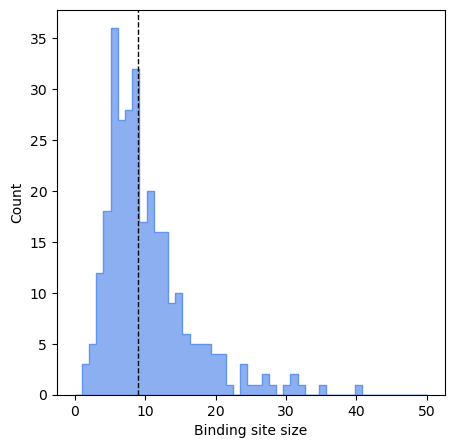

In [8]:
D = all_bss.number_bs_res
print(len(D))

bns_size = np.linspace(0, 50, 50)
plot_hist(
    D, "Binding site size", bns_size, "cornflowerblue", dpi = 100,
    figsize = (5, 5)#, out = os.path.join(figs_dir, "BSS_size.png")
)

## LIGAND BINDING SITE AVERAGE DIVERGENCE

293
	MIN = 0.0	MEAN = 40.93	MEDIAN = 39.8	MAX = 80.9


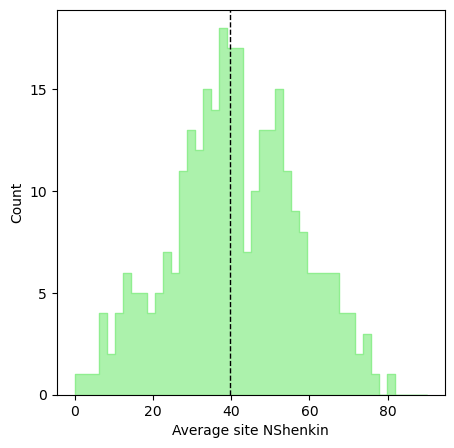

In [10]:
D = all_bss.norm_shenkin_rel
print(len(D))

bns_shenk = np.linspace(0, 90, 45)
plot_hist(
    D, "Average site NShenkin", bns_shenk, "lightgreen", dpi = 100,
    yticks = list(np.linspace(0,15,4)), figsize = (5, 5),# out = os.path.join(figs_dir, "BSS_shenk.png")
)

## LIGAND BINDING SITE AVERAGE MISSENSE ENRICHMENT

293
	MIN = -0.71	MEAN = 0.03	MEDIAN = 0.01	MAX = 1.04


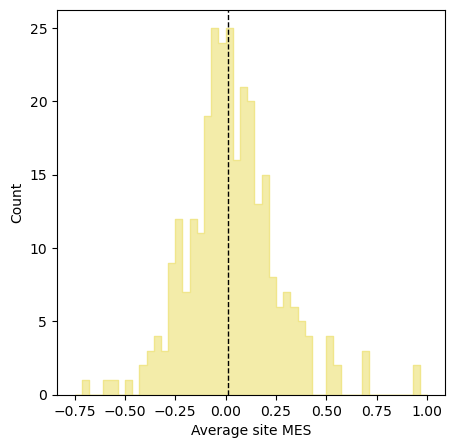

In [12]:
D = all_bss.MES
print(len(D))

bns_mes = np.linspace(-0.75, 1.00, 50)
plot_hist(D, "Average site MES", bns_mes, "khaki", dpi = 100,
         figsize = (5, 5),# out = os.path.join(figs_dir, "BSS_MES.png")
)

## LIGAND BINDING SITE AVERAGE RELATIVE SOLVENT ACCESSIBILITY

In [13]:
all_bs_ress.shape

(14172, 62)

In [14]:
rsa_profs = get_rsa_profiles(all_bss, all_bs_ress)
average_rsas = [statistics.median(v) for v in rsa_profs.values()]

293
	MIN = 4.3	MEAN = 32.07	MEDIAN = 31.1	MAX = 81.7


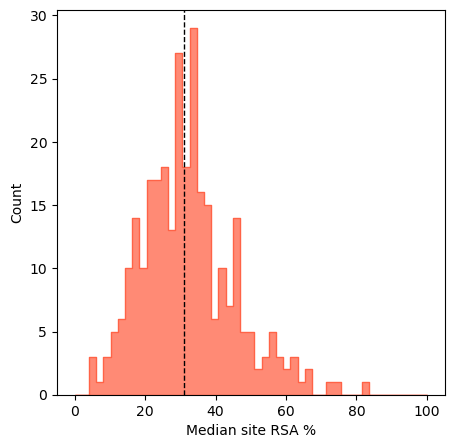

In [19]:
D_un = average_rsas
print(len(D))

bns_RSA = np.linspace(0, 100, 50)
plot_hist(D_un, "Median site RSA %", bns_RSA, "tomato", dpi = 100,
         figsize = (5, 5),# out = os.path.join(figs_dir, "BSS_RSA.png")
)